In [1]:
import os
import numpy as np
from sklearn.manifold import Isomap
import sys

sys.path.append(os.path.join(os.getcwd(), "..", "code"))  # ugly but ok, this is a draft

import ssnp_vae # type: ignore
import ssnp # type: ignore

In [2]:
X, y = (np.load(os.path.join("..", "data", "mnist", f"{d}.npy")) for d in ("X", "y"))

In [3]:
from sklearn.model_selection import train_test_split

X_train, _, y_train, _ = train_test_split(X, y, train_size=5_000, stratify=y, random_state=420)

In [4]:
isomap = Isomap()
X_isomap = isomap.fit_transform(X_train)

In [5]:
sharp = ssnp_vae.V_SSNP(
    X.shape[1],
    len(np.unique(y_train)),
    "diagonal_normal",
    variational_layer_kwargs=dict(kl_weight=0.1),
    bottleneck_activation="linear",
    bottleneck_l1=0.0,
    bottleneck_l2=0.5,
)
sharp.fit(X_train, y_train, verbose=False, batch_size=128, epochs=15)
X_sharp_gt = sharp.transform(X_train)

2022-09-08 10:57:20.649681: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.


2022-09-08 10:57:20.655335: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-08 10:57:20.655635: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-08 10:57:20.656199: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-08 10:57:20.656985: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built witho

157/157 [==============================] - 1s 3ms/step


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(
    [
        "#aee39a",
        "#9e37d0",
        "#7cee4d",
        "#713d83",
        "#1be19f",
        "#fb2076",
        "#458612",
        "#e89ff0",
        "#115d52",
        "#f79302",
    ]
)


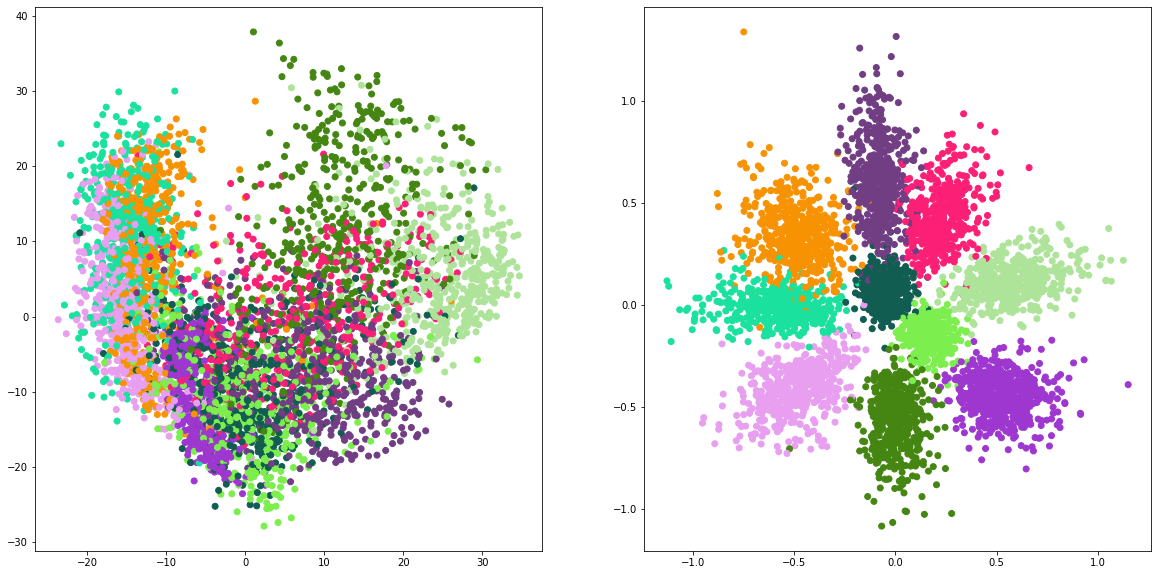

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.scatter(X_isomap[:, 0], X_isomap[:, 1], c=[cmap(y_i) for y_i in y_train])
ax2.scatter(X_sharp_gt[:, 0], X_sharp_gt[:, 1], c=[cmap(y_i) for y_i in y_train])


In [9]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=5_000, noise=0.05)

In [10]:
X_isomap = Isomap().fit_transform(X)

In [11]:
from sklearn.cluster import AgglomerativeClustering, KMeans

n_clusters = 3
clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
y_km = clusterer.fit_predict(X)
sharp_km = ssnp_vae.V_SSNP(
    X.shape[1],
    n_clusters,
    "triangle",
    variational_layer_kwargs=dict(use_bias=True),
    bottleneck_activation="linear",
    bottleneck_l1=0.0,
    bottleneck_l2=0.5,
)
sharp_km.fit(X, y_km, verbose=False, epochs=15, batch_size=128)
X_sharp_km = sharp_km.transform(X)

157/157 [==============================] - 1s 6ms/step


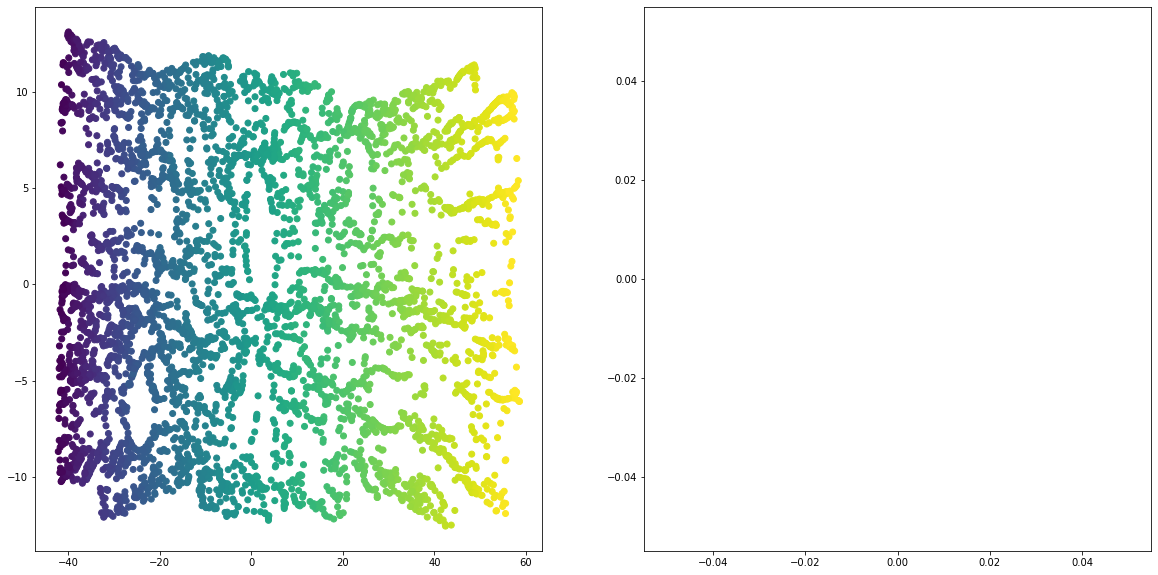

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.scatter(X_isomap[:, 0], X_isomap[:, 1], c=t)
ax2.scatter(X_sharp_km[:, 0], X_sharp_km[:, 1], c=t)


In [13]:
X_sharp_km[:5]

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan]], dtype=float32)